In [134]:
from __future__ import print_function  # Python 2 and 3
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_rows', 137)
pd.set_option('display.max_columns', 80)


In [136]:
data = pd.read_csv('model_df_cagr.csv', index_col=0)


-0.022077853257017697

In [137]:
data['cagr'].describe()

count    336948.000000
mean         -0.022078
std           0.140637
min          -1.000000
25%          -0.083180
50%           0.033825
75%           0.073602
max           0.294712
Name: cagr, dtype: float64

In [138]:
data

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,delinq_amnt,collections_12_mths_ex_med,application_type,roi_percent,cagr,credit_hist_years
4,68476807,10400.0,60 months,22.45,289.91,F,F1,3,MORTGAGE,104433.0,2015-12-01,major_purchase,PA,25.37,1.0,1998-06-01,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,0.0,0.0,0.0,Individual,0.128894,0.024544,17.5
13,66624733,18000.0,60 months,19.48,471.70,E,E2,7,RENT,150000.0,2015-12-01,debt_consolidation,CA,9.39,0.0,2005-06-01,665.0,669.0,1.0,18.0,1.0,14052.0,40.7,27.0,0.0,0.0,0.0,Individual,-0.474848,-0.120862,10.5
19,68495092,8650.0,36 months,19.89,320.99,E,E3,8,RENT,55000.0,2015-12-01,debt_consolidation,IN,25.49,0.0,2005-03-01,675.0,679.0,4.0,18.0,1.0,9568.0,46.0,19.0,0.0,0.0,0.0,Individual,0.062484,0.020409,10.8
27,68526907,16000.0,60 months,17.97,406.04,D,D4,1,MORTGAGE,109000.0,2015-12-01,debt_consolidation,NM,23.35,0.0,2002-04-01,680.0,684.0,1.0,11.0,0.0,42469.0,87.6,33.0,0.0,0.0,0.0,Individual,0.091973,0.017753,13.7
31,68341789,24250.0,60 months,24.24,701.01,F,F3,4,MORTGAGE,75000.0,2015-12-01,debt_consolidation,NY,20.84,0.0,2007-04-01,660.0,664.0,0.0,18.0,0.0,24799.0,65.3,21.0,0.0,0.0,0.0,Individual,-0.829921,-0.298334,8.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260514,90195681,6400.0,36 months,19.99,237.82,D,D4,0,MORTGAGE,18876.0,2016-10-01,debt_consolidation,NY,12.84,0.0,2006-05-01,670.0,674.0,0.0,5.0,1.0,7380.0,70.3,11.0,0.0,0.0,0.0,Individual,0.162377,0.051435,10.4
2260535,90229508,30000.0,60 months,17.99,761.64,D,D2,10,RENT,130000.0,2016-10-01,debt_consolidation,NY,10.54,0.0,1997-10-01,695.0,699.0,2.0,17.0,0.0,21536.0,36.4,39.0,0.0,0.0,0.0,Individual,0.110282,0.021143,19.0
2260541,90155344,7000.0,36 months,16.99,249.54,D,D1,1,RENT,68000.0,2016-10-01,debt_consolidation,TX,12.60,0.0,2004-07-01,665.0,669.0,1.0,7.0,0.0,4897.0,85.9,15.0,0.0,0.0,0.0,Individual,0.119273,0.038274,12.3
2260547,90265158,19200.0,60 months,17.99,487.45,D,D2,10,RENT,55000.0,2016-10-01,debt_consolidation,FL,28.47,1.0,2002-05-01,670.0,674.0,0.0,20.0,1.0,12698.0,44.6,33.0,0.0,0.0,0.0,Individual,-0.410815,-0.100398,14.4


In [139]:
data = data[data['issue_d']<'2015-01-01']

In [140]:
drop_cols = ['earliest_cr_line', 'grade', 'id', 'fico_range_low', 'issue_d']
data= data.drop(drop_cols,axis=1)

(0, 50)

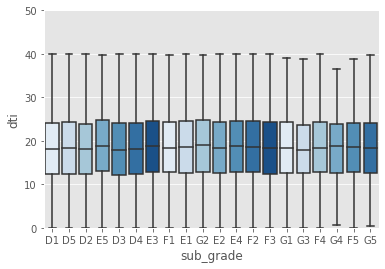

In [141]:
import seaborn as sns

sns.boxplot(x='sub_grade', y='dti' , data=data, palette = sns.color_palette("Blues", n_colors=7))
plt.ylim(0,50)

In [142]:
data

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,delinq_amnt,collections_12_mths_ex_med,application_type,roi_percent,cagr,credit_hist_years
1117051,21425.0,60 months,15.59,516.36,D1,6,RENT,63800.0,credit_card,MO,18.49,0.0,689.0,0.0,10.0,0.0,16374.0,76.2,35.0,0.0,0.0,0.0,Individual,0.190768,0.035537,11.3
1117055,12975.0,36 months,17.86,468.17,D5,10,RENT,60000.0,house,FL,22.42,0.0,684.0,0.0,11.0,0.0,5200.0,33.1,19.0,0.0,0.0,0.0,Individual,-0.557080,-0.237731,15.9
1117060,2000.0,36 months,15.99,70.31,D2,7,RENT,37000.0,other,AZ,16.19,2.0,704.0,1.0,9.0,0.0,4533.0,20.1,22.0,0.0,0.0,0.0,Individual,0.187975,0.059097,21.0
1117064,4000.0,36 months,15.99,140.61,D2,9,RENT,50000.0,debt_consolidation,NY,33.99,0.0,669.0,1.0,12.0,0.0,5697.0,65.5,23.0,0.0,0.0,0.0,Individual,0.243166,0.075251,12.8
1117080,8750.0,36 months,21.99,334.13,E5,8,MORTGAGE,81200.0,moving,HI,29.38,0.0,684.0,2.0,12.0,0.0,31362.0,75.9,37.0,0.0,0.0,0.0,Individual,0.285565,0.087338,13.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939341,20000.0,60 months,19.91,361.62,E4,10,RENT,69996.0,debt_consolidation,CA,13.84,0.0,719.0,1.0,5.0,0.0,19886.0,98.4,13.0,0.0,0.0,0.0,Individual,-0.260663,-0.058612,13.5
1939342,18000.0,60 months,17.58,452.98,D4,10,MORTGAGE,100000.0,debt_consolidation,TX,17.57,0.0,689.0,1.0,13.0,0.0,19243.0,73.2,41.0,0.0,0.0,0.0,Individual,0.511215,0.086089,14.9
1939343,17500.0,60 months,22.74,471.10,G1,6,MORTGAGE,95000.0,debt_consolidation,WA,24.78,0.0,664.0,1.0,12.0,0.0,23722.0,76.3,23.0,0.0,0.0,0.0,Individual,-0.730800,-0.230843,10.0
1939349,20500.0,36 months,16.77,728.54,D2,7,RENT,60000.0,debt_consolidation,NY,16.40,1.0,704.0,3.0,10.0,0.0,15417.0,58.4,20.0,0.0,0.0,0.0,Individual,0.276900,0.084890,23.3


## Random Forest

In [143]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [144]:
data.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,delinq_amnt,collections_12_mths_ex_med,application_type,roi_percent,cagr,credit_hist_years
1117051,21425.0,60 months,15.59,516.36,D1,6,RENT,63800.0,credit_card,MO,18.49,0.0,689.0,0.0,10.0,0.0,16374.0,76.2,35.0,0.0,0.0,0.0,Individual,0.190768,0.035537,11.3
1117055,12975.0,36 months,17.86,468.17,D5,10,RENT,60000.0,house,FL,22.42,0.0,684.0,0.0,11.0,0.0,5200.0,33.1,19.0,0.0,0.0,0.0,Individual,-0.557080,-0.237731,15.9
1117060,2000.0,36 months,15.99,70.31,D2,7,RENT,37000.0,other,AZ,16.19,2.0,704.0,1.0,9.0,0.0,4533.0,20.1,22.0,0.0,0.0,0.0,Individual,0.187975,0.059097,21.0
1117064,4000.0,36 months,15.99,140.61,D2,9,RENT,50000.0,debt_consolidation,NY,33.99,0.0,669.0,1.0,12.0,0.0,5697.0,65.5,23.0,0.0,0.0,0.0,Individual,0.243166,0.075251,12.8
1117080,8750.0,36 months,21.99,334.13,E5,8,MORTGAGE,81200.0,moving,HI,29.38,0.0,684.0,2.0,12.0,0.0,31362.0,75.9,37.0,0.0,0.0,0.0,Individual,0.285565,0.087338,13.2


In [145]:
le = LabelEncoder()

In [146]:
categorical_features = [feature for feature in data.columns if data[feature].dtypes == 'O']

for feature in categorical_features:
    data[feature]=le.fit_transform(data[feature])
data

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,delinq_amnt,collections_12_mths_ex_med,application_type,roi_percent,cagr,credit_hist_years
1117051,21425.0,1,15.59,516.36,0,6,4,63800.0,1,23,18.49,0.0,689.0,0.0,10.0,0.0,16374.0,76.2,35.0,0.0,0.0,0.0,0,0.190768,0.035537,11.3
1117055,12975.0,0,17.86,468.17,4,10,4,60000.0,5,9,22.42,0.0,684.0,0.0,11.0,0.0,5200.0,33.1,19.0,0.0,0.0,0.0,0,-0.557080,-0.237731,15.9
1117060,2000.0,0,15.99,70.31,1,7,4,37000.0,9,3,16.19,2.0,704.0,1.0,9.0,0.0,4533.0,20.1,22.0,0.0,0.0,0.0,0,0.187975,0.059097,21.0
1117064,4000.0,0,15.99,140.61,1,9,4,50000.0,2,32,33.99,0.0,669.0,1.0,12.0,0.0,5697.0,65.5,23.0,0.0,0.0,0.0,0,0.243166,0.075251,12.8
1117080,8750.0,0,21.99,334.13,9,8,0,81200.0,8,11,29.38,0.0,684.0,2.0,12.0,0.0,31362.0,75.9,37.0,0.0,0.0,0.0,0,0.285565,0.087338,13.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939341,20000.0,1,19.91,361.62,8,10,4,69996.0,2,4,13.84,0.0,719.0,1.0,5.0,0.0,19886.0,98.4,13.0,0.0,0.0,0.0,0,-0.260663,-0.058612,13.5
1939342,18000.0,1,17.58,452.98,3,10,0,100000.0,2,41,17.57,0.0,689.0,1.0,13.0,0.0,19243.0,73.2,41.0,0.0,0.0,0.0,0,0.511215,0.086089,14.9
1939343,17500.0,1,22.74,471.10,15,6,0,95000.0,2,45,24.78,0.0,664.0,1.0,12.0,0.0,23722.0,76.3,23.0,0.0,0.0,0.0,0,-0.730800,-0.230843,10.0
1939349,20500.0,0,16.77,728.54,1,7,4,60000.0,2,32,16.40,1.0,704.0,3.0,10.0,0.0,15417.0,58.4,20.0,0.0,0.0,0.0,0,0.276900,0.084890,23.3


In [147]:
Xrf = data.drop(['roi_percent','cagr'], axis=1)
yrf = data['cagr']


In [150]:
from sklearn.model_selection import train_test_split

Xrf_train,Xrf_test, yrf_train, yrf_test = train_test_split(Xrf,yrf)

In [151]:
randomForest = ensemble.RandomForestRegressor(n_estimators = 500)

grid_param_forest = [{
    "max_features": [3,4,5,10],
    "random_state": [42]}]

grid_randomForest= GridSearchCV(estimator = randomForest,param_grid=grid_param_forest, scoring='neg_mean_squared_error',cv=5)


grid_randomForest.fit(Xrf_train,yrf_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=500, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [3, 4, 5, 10], 'r

In [152]:
grid_randomForest.best_params_


{'max_features': 3, 'random_state': 42}

In [153]:
top_forest = grid_randomForest.best_estimator_


In [154]:
grid_randomForest.best_score_




-0.013641023128395073

In [155]:
grid_randomForest.predict(Xrf_train)

array([0.0741235 , 0.03181816, 0.04363978, ..., 0.06119505, 0.04175964,
       0.0650016 ])

In [156]:
joint = Xrf_train.copy()

joint['prediction'] = grid_randomForest.predict(Xrf_train)

rf_joint_df1 = pd.concat([joint,yrf_train],axis=1)
rf_joint_df1

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,delinq_amnt,collections_12_mths_ex_med,application_type,credit_hist_years,prediction,cagr
1836226,10000.0,0,17.77,360.38,0,9,0,78453.0,1,21,17.16,0.0,684.0,1.0,15.0,0.0,13094.0,83.4,40.0,0.0,0.0,0.0,0,21.7,0.074124,0.089566
1937766,16000.0,1,19.91,423.11,8,4,4,53000.0,9,20,4.53,0.0,664.0,3.0,9.0,0.0,10676.0,73.6,39.0,0.0,0.0,0.0,0,8.7,0.031818,0.049223
1913073,24000.0,0,19.05,880.36,3,2,4,190000.0,2,29,9.35,1.0,679.0,3.0,11.0,0.0,13745.0,41.8,19.0,0.0,0.0,0.0,0,19.4,0.043640,0.049381
1897642,21250.0,1,19.72,559.69,4,10,0,48000.0,2,21,28.18,0.0,689.0,0.0,7.0,0.0,16207.0,85.8,11.0,0.0,0.0,0.0,0,10.3,0.053626,0.079408
1310824,6600.0,0,18.92,241.67,3,6,0,38000.0,2,5,22.41,0.0,679.0,2.0,14.0,0.0,16058.0,49.0,20.0,0.0,0.0,0.0,0,9.4,0.036005,0.049540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283612,7100.0,0,16.59,251.69,0,1,4,27040.0,2,20,30.32,2.0,664.0,0.0,9.0,0.0,2359.0,90.7,40.0,0.0,0.0,0.0,0,7.4,0.048791,0.084870
1347651,30000.0,1,24.50,871.77,12,10,0,135000.0,1,19,13.59,0.0,714.0,0.0,11.0,0.0,57004.0,76.0,43.0,0.0,0.0,0.0,0,15.4,0.042926,0.052644
1921356,12375.0,0,17.27,442.87,0,1,4,33280.0,2,10,9.27,0.0,679.0,0.0,5.0,0.0,7915.0,87.0,6.0,0.0,0.0,0.0,0,4.7,0.061195,0.075681
1172355,24000.0,1,19.52,629.47,6,10,0,56500.0,2,9,10.20,0.0,694.0,3.0,15.0,0.0,18535.0,67.9,20.0,0.0,0.0,0.0,0,15.5,0.041760,0.076207


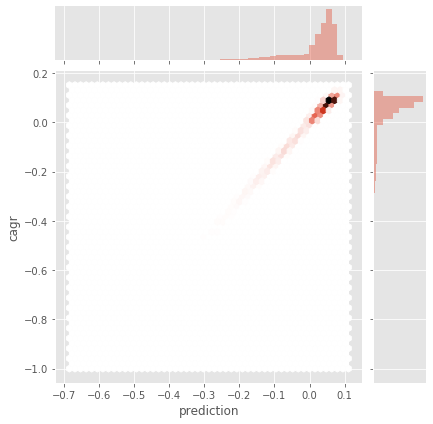

In [157]:
sns.jointplot(x='prediction', y='cagr',data=rf_joint_df1, kind='hex')

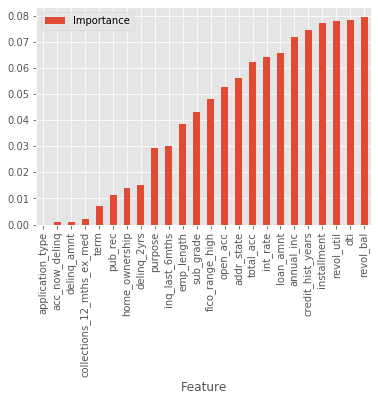

In [158]:
feature_importance=pd.DataFrame(zip(list(top_forest.feature_importances_),Xrf_train.columns))
feature_importance.columns = ['Importance','Feature']
feature_importance.sort_values('Importance').plot.bar(x='Feature',y='Importance')

In [159]:
t = rf_joint_df1[rf_joint_df1['prediction']>.025]

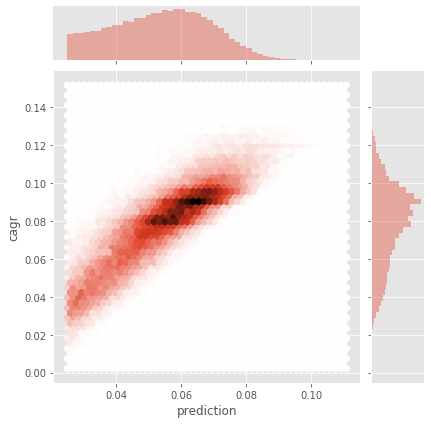

In [160]:
sns.jointplot(x='prediction', y='cagr',data=t, kind='hex')

In [161]:
top_forest.score(Xrf_test,yrf_test)

0.013426836487566263

In [162]:
joint_test = Xrf_test.copy()

joint_test['test_prediction'] = top_forest.predict(Xrf_test)

In [163]:
joint_test

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,delinq_amnt,collections_12_mths_ex_med,application_type,credit_hist_years,test_prediction
1794613,5000.0,0,17.76,180.17,0,10,4,63180.0,2,29,7.86,3.0,674.0,1.0,9.0,0.0,4368.0,68.2,27.0,0.0,0.0,0.0,0,19.1,0.051602
1217005,14350.0,0,15.61,501.75,0,0,0,36000.0,2,15,17.40,0.0,714.0,1.0,11.0,0.0,12231.0,52.5,28.0,0.0,0.0,0.0,0,22.5,0.017364
1302940,20400.0,1,24.08,587.82,11,5,4,60000.0,2,0,14.52,0.0,709.0,1.0,5.0,0.0,3332.0,18.7,13.0,0.0,0.0,0.0,0,5.2,-0.026140
1129952,5000.0,0,15.99,175.77,1,1,4,34000.0,1,4,6.92,0.0,734.0,1.0,5.0,0.0,6350.0,48.8,6.0,0.0,0.0,0.0,0,7.2,0.028648
1874132,3375.0,0,21.00,127.16,6,7,4,18000.0,2,26,21.40,0.0,679.0,0.0,10.0,0.0,7271.0,72.7,12.0,0.0,0.0,0.0,0,7.4,0.040139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1933641,30000.0,0,19.22,1103.03,4,10,4,175000.0,9,32,11.62,0.0,684.0,1.0,11.0,0.0,8286.0,19.5,32.0,0.0,0.0,0.0,0,20.7,0.044578
1772678,16000.0,1,19.52,419.65,3,6,4,91000.0,2,4,23.74,0.0,674.0,0.0,14.0,0.0,4623.0,57.1,29.0,0.0,0.0,1.0,0,13.3,-0.003293
1882531,24250.0,1,17.77,612.77,0,0,0,54000.0,4,32,6.89,2.0,694.0,2.0,11.0,0.0,6901.0,22.9,33.0,0.0,0.0,0.0,0,42.6,0.007919
1332061,12550.0,1,23.40,356.69,9,10,0,68000.0,1,14,29.92,0.0,679.0,3.0,14.0,0.0,9105.0,83.5,62.0,0.0,0.0,0.0,0,11.9,-0.007781


In [164]:
rf_joint_df2= pd.concat([joint_test,yrf_test],axis=1)

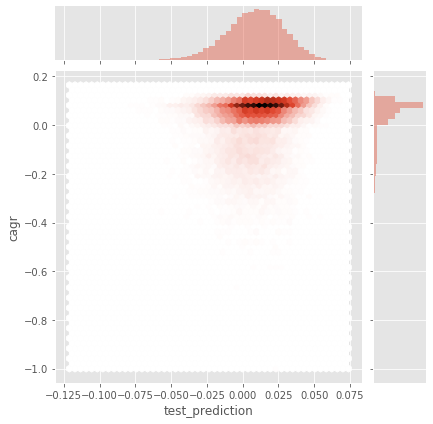

In [165]:
sns.jointplot(x='test_prediction', y='cagr',data=rf_joint_df2, kind='hex')k

In [191]:
t = rf_joint_df2[rf_joint_df2['test_prediction']>.045]

In [192]:
t

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,delinq_amnt,collections_12_mths_ex_med,application_type,credit_hist_years,test_prediction,cagr
1794613,5000.0,0,17.76,180.17,0,10,4,63180.0,2,29,7.86,3.0,674.0,1.0,9.0,0.0,4368.0,68.2,27.0,0.0,0.0,0.0,0,19.1,0.051602,0.083062
1251081,4675.0,0,20.99,176.11,8,10,4,88300.0,4,20,12.44,3.0,669.0,0.0,7.0,0.0,2640.0,80.0,29.0,0.0,0.0,0.0,0,16.6,0.052747,0.107021
1870096,35000.0,1,22.95,985.67,10,10,0,91945.0,2,26,15.92,0.0,684.0,1.0,10.0,0.0,25083.0,74.4,35.0,0.0,0.0,0.0,0,26.8,0.046955,0.109677
1349744,12700.0,0,18.25,460.73,2,8,0,125000.0,2,32,11.40,1.0,684.0,3.0,11.0,0.0,10141.0,50.7,26.0,0.0,0.0,0.0,0,18.1,0.050926,-0.078271
1230387,4000.0,0,23.43,155.74,10,10,0,100000.0,9,21,9.26,0.0,674.0,1.0,7.0,0.0,6018.0,68.4,13.0,0.0,0.0,0.0,0,29.1,0.066289,0.118881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1761494,2500.0,0,23.70,97.69,10,9,3,34000.0,9,9,20.97,0.0,684.0,0.0,10.0,0.0,19559.0,69.4,21.0,0.0,0.0,0.0,0,12.2,0.045640,-0.461329
1204917,1200.0,0,23.43,46.73,10,10,0,54000.0,12,33,19.60,0.0,684.0,2.0,9.0,0.0,12977.0,86.5,16.0,0.0,0.0,0.0,0,11.8,0.053403,-0.336105
1861220,2500.0,0,19.05,91.71,3,8,4,70000.0,7,41,28.92,0.0,704.0,0.0,10.0,0.0,8013.0,83.5,27.0,0.0,0.0,0.0,0,19.8,0.047060,0.033574
1855743,4800.0,0,18.49,174.72,1,5,0,46821.0,9,33,22.12,0.0,694.0,0.0,7.0,0.0,5333.0,82.0,19.0,0.0,0.0,0.0,0,18.5,0.048507,0.094278


In [201]:
len(t[t['cagr']<0])/len(t)

0.11794871794871795

In [202]:
len(rf_joint_df2[rf_joint_df2['cagr']<0])/len(rf_joint_df2)

0.2410647378881178

In [203]:
len(t[t['test_prediction']<0])/len(t)

0.0

In [204]:
len(rf_joint_df2[rf_joint_df2['test_prediction']>0])/len(rf_joint_df2)

0.6780047567849347

In [205]:
t['int_rate'].describe()

count    780.000000
mean      19.641256
std        2.029590
min       15.330000
25%       18.250000
50%       19.050000
75%       21.000000
max       25.800000
Name: int_rate, dtype: float64

In [206]:
rf_joint_df2['int_rate'].describe()

count    30693.000000
mean        19.200278
std          2.684163
min          6.000000
25%         17.560000
50%         18.750000
75%         20.990000
max         26.060000
Name: int_rate, dtype: float64

In [207]:
t['cagr'].describe()

count    780.000000
mean       0.046687
std        0.109552
min       -0.673003
25%        0.044310
50%        0.086263
75%        0.097858
max        0.126920
Name: cagr, dtype: float64

In [208]:
rf_joint_df2['cagr'].describe()

count    30693.000000
mean         0.012780
std          0.117518
min         -1.000000
25%          0.004152
50%          0.057723
75%          0.086083
max          0.164457
Name: cagr, dtype: float64

In [209]:
rf_joint_df2.to_csv('simulation.csv')

## EDA on Predicted Data

In [56]:
t

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,delinq_amnt,collections_12_mths_ex_med,application_type,credit_hist_years,test_prediction,roi_percent
1764241,35000.0,1,20.20,931.19,4,10,1,125000.0,9,34,20.20,0.0,704.0,1.0,18.0,0.0,30758.0,88.9,41.0,0.0,0.0,0.0,0,23.0,0.132454,0.603219
1633030,15250.0,1,15.20,364.40,3,10,1,98279.0,2,34,23.41,0.0,704.0,1.0,15.0,0.0,44685.0,51.0,44.0,0.0,0.0,0.0,0,19.8,0.103110,-0.697810
260927,3175.0,0,17.57,114.11,3,10,1,40000.0,2,42,4.38,0.0,664.0,2.0,9.0,1.0,5004.0,48.6,39.0,0.0,0.0,0.0,0,22.1,0.106208,0.091745
1875330,3000.0,0,18.49,109.20,1,4,5,52000.0,9,43,28.43,0.0,694.0,0.0,10.0,0.0,23892.0,76.8,25.0,0.0,0.0,0.0,0,24.3,0.101910,0.310337
1214557,6050.0,0,22.15,231.53,9,10,1,109000.0,9,20,17.86,0.0,664.0,0.0,9.0,1.0,40778.0,93.1,44.0,0.0,0.0,0.0,0,29.3,0.119967,0.377632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821442,7750.0,0,18.25,281.16,1,8,5,68000.0,6,9,13.61,0.0,699.0,1.0,4.0,0.0,9888.0,89.9,8.0,0.0,0.0,0.0,0,9.2,0.106023,0.072795
1802757,2000.0,0,21.15,75.51,6,6,5,25000.0,9,24,17.52,0.0,674.0,1.0,12.0,0.0,8893.0,64.2,14.0,0.0,0.0,0.0,0,5.6,0.183732,0.343975
1292790,28550.0,1,20.49,764.21,6,10,1,65000.0,2,3,29.89,0.0,694.0,0.0,13.0,0.0,12979.0,93.4,39.0,0.0,0.0,0.0,0,10.8,0.140075,0.416033
1201804,1600.0,0,20.20,59.63,7,7,5,34000.0,9,4,31.31,0.0,679.0,0.0,5.0,0.0,3915.0,81.6,9.0,0.0,0.0,0.0,0,20.8,0.129654,0.341519


In [126]:
unfilter_data = pd.read_csv('model_df.csv', index_col=0)

In [127]:
unfilter_data['roi_percent'].describe()

count    336948.000000
mean         -0.000363
std           0.395961
min          -1.000000
25%          -0.302195
50%           0.135994
75%           0.279418
max           1.170300
Name: roi_percent, dtype: float64

In [129]:
post_2015_df = unfilter_data[unfilter_data['issue_d']>'2015-01-01']
post_2015_df['roi_percent'].describe()

count    205459.000000
mean         -0.071755
std           0.395730
min          -1.000000
25%          -0.435315
50%           0.084884
75%           0.239327
max           1.170300
Name: roi_percent, dtype: float64

In [133]:
len(post_2015_df[post_2015_df['roi_percent']<0])/len(post_2015_df)

0.3659172876340292